# Small Tip of Jupyter Notebook

- green : edit mode
- blue : command mode
- H : keyboard shortcut
---
- Shift-Enter : run cell, select below
- Ctrl-Enter : run selected cells
- Alt-Enter : run cell and insert below
- Y : change cell to code
- M : change cell to markdown
- A : insert cell above
- B : insert cell below
- D,D : delete selected cells
---
- L : toggle line numbers
- Shift-M : merge selected cells, or current cell with cell below if only one cell is selected
- Ctrl-Shift-Minus : split cell at cursor(s)
- X : cut selected cells
- C : copy selected cells
- Shift-V : paste cells above
- V : paste cells below

In [2]:
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import torch 

## What is PyTorch?
PyTorch is a Python-based scientific computing package serving two broad purposes:

A replacement for NumPy to use the power of GPUs and other accelerators.

An automatic differentiation library that is useful to implement neural networks.

# 0. Tensor?
- 텐서(tensor)는 배열(array)이나 행렬(matrix)과 매우 유사한 특수한 자료구조입니다. PyTorch에서는 텐서를 사용하여 모델의 입력(input)과 출력(output), 그리고 모델의 매개변수들을 부호화(encode)합니다.

- 텐서는 GPU나 다른 하드웨어 가속기에서 실행할 수 있다는 점만 제외하면 NumPy 의 ndarray와 유사합니다. 실제로 텐서와 NumPy 배열(array)은 종종 동일한 내부(underly) 메모리를 공유할 수 있어 데이터를 복사할 필요가 없습니다. 텐서는 또한 automatic differentiation에 최적화되어 있습니다.

- torch.Tensor는 single data type을 elements로하는 multi-dimensional matrix입니다.

In [3]:
?torch.tensor 

In [7]:
# Torch initialization 

# Directly from data
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(f"Tensor from data: \n {x_data} \n")

# From a NumPy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(f"Tensor from numpy: \n {x_np} \n")

# From another tensor
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

# With random or constant values
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Tensor from data: 
 tensor([[1, 2],
        [3, 4]]) 

Tensor from numpy: 
 tensor([[1, 2],
        [3, 4]]) 

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.2294, 0.7665],
        [0.2767, 0.4619]]) 

Random Tensor: 
 tensor([[0.5556, 0.1646, 0.9183],
        [0.7790, 0.3742, 0.7808]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
# torch.tensor(), torch.Tensor.detach(), torch.Tensor.clone()

a = torch.tensor([[1, 2], [3, 4]], dtype=torch.float, requires_grad=True)
b = a.detach() # gradient 전파가 안되는 tensor 생성, 메모리 공유
c = a.clone() # 메모리 공유 x
print(a)
print(b)
print(c)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]], grad_fn=<CloneBackward0>)


In [ ]:
b[0][0] = 9
print(a) # 메모리 공유
c[0][0] = 1
print(a) # 메모리 공유 x

tensor([[9., 2.],
        [3., 4.]], requires_grad=True)
tensor([[9., 2.],
        [3., 4.]], requires_grad=True)


In [ ]:
d = b.clone().requires_grad_(True)
d

tensor([[9., 2.],
        [3., 4.]], requires_grad=True)

In [ ]:
e = d.clone().detach()
e

tensor([[1., 2.],
        [3., 4.]])

In [ ]:
# to(), gpu 사용하기
?torch.Tensor.to

In [ ]:
!nvidia-smi
# nvidia-smi -l 5

Thu Jun 23 04:52:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
f = a.to(dtype=torch.int, device=device)
f[0][1] = 9
a, f, device

(tensor([[9., 2.],
         [3., 4.]], requires_grad=True), tensor([[9, 9],
         [3, 4]], device='cuda:0', dtype=torch.int32), device(type='cuda', index=0))

In [ ]:
if torch.cuda.is_available():
    print('cuda index:', torch.cuda.current_device())
    print('gpu 개수:', torch.cuda.device_count())
    print('graphic name:', torch.cuda.get_device_name())

cuda index: 0
gpu 개수: 1
graphic name: Tesla T4


### 참고. tensor error 시 check point!
- data가 Tensor로 변환이 되는 data인가?
- 연산하고 있는 Tensor간 data type이 같은가?
- 연산시 CPU Tensor와 GPU Tensor를 같은 device로 통일했는가?

# 1. 텐서의 차원(rank)

- 0차원 -> 스칼라
- 1차원 -> 벡터
- 2차원 -> 2차원 행렬
- 3차원 -> 3차원 행렬
- n차원 -> 랭크 n 텐서

In [ ]:
# 0차원 텐서 -> scalar
x = torch.tensor(2)
x, x.dim(), x.shape

(tensor(2), 0, torch.Size([]))

In [ ]:
?torch.rand

In [ ]:
# 1차원 텐서 -> vector
x = torch.rand(2)
x, x.dim(), x.shape

(tensor([0.5697, 0.2655]), 1, torch.Size([2]))

In [ ]:
# 2차원 텐서 -> 2 dimensional matrix
x = torch.rand(2, 3)
x, x.dim(), x.shape

(tensor([[0.0919, 0.7796, 0.7187],
         [0.7238, 0.6106, 0.2429]]), 2, torch.Size([2, 3]))

In [ ]:
# 3차원 텐서 -> 3 dimensional matrix
x = torch.rand(3, 2, 5)
x, x.dim(), x.shape

(tensor([[[0.2552, 0.3289, 0.7903, 0.6741, 0.9482],
          [0.4134, 0.2651, 0.4649, 0.0379, 0.3975]],
 
         [[0.6953, 0.4034, 0.2569, 0.9738, 0.5510],
          [0.7597, 0.6357, 0.9496, 0.9850, 0.6665]],
 
         [[0.5269, 0.6927, 0.3197, 0.1729, 0.1711],
          [0.9899, 0.3381, 0.5606, 0.4293, 0.4811]]]),
 3,
 torch.Size([3, 2, 5]))

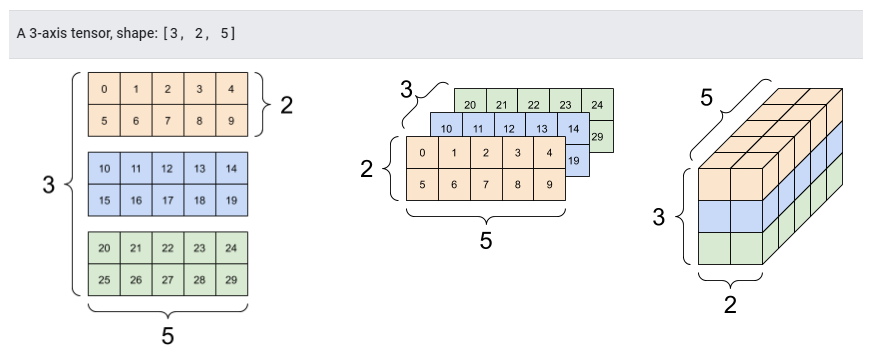

In [ ]:
# 4차원 텐서 -> vision분야에서 주로 사용
x = torch.rand(128, 3, 4, 4) # batch-size, channel, height, width
x.dim(), x.shape, x

(4,
 torch.Size([128, 3, 4, 4]),
 tensor([[[[9.3516e-01, 1.9973e-01, 3.8515e-02, 7.5987e-01],
           [6.9260e-01, 8.9911e-01, 4.9057e-01, 2.3046e-01],
           [1.1736e-01, 5.7167e-01, 5.8094e-01, 9.1698e-01],
           [1.4537e-01, 4.8245e-02, 7.4497e-01, 8.2054e-01]],
 
          [[7.8532e-01, 8.5375e-02, 9.6059e-03, 6.8681e-01],
           [6.9699e-01, 6.8471e-02, 4.7843e-01, 6.0059e-02],
           [4.7603e-01, 2.2922e-01, 2.2539e-01, 3.6420e-01],
           [6.1602e-01, 5.9545e-01, 9.0445e-01, 2.0452e-03]],
 
          [[5.0544e-02, 3.1893e-01, 6.2528e-01, 8.8648e-01],
           [4.6567e-01, 4.7797e-01, 4.0862e-01, 5.2968e-01],
           [8.3301e-01, 4.7057e-02, 1.4385e-01, 7.0384e-01],
           [4.0474e-01, 6.2168e-01, 9.1527e-01, 2.2981e-01]]],
 
 
         [[[1.7672e-01, 9.8856e-01, 4.1332e-01, 5.8114e-01],
           [4.6535e-01, 9.6122e-01, 1.4637e-02, 8.5136e-01],
           [6.1468e-01, 2.4002e-01, 9.8001e-03, 7.9835e-01],
           [1.3272e-01, 8.7116e-01, 3.67

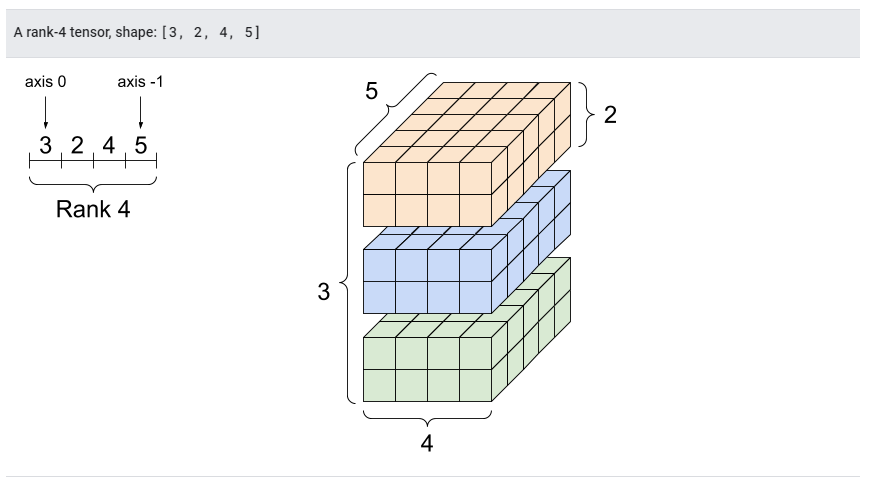

# 2. 차원과 shape 바꾸기

- 차원 늘리기 : unsqueeze()
- 차원 줄이기 : squeeze()
- shpae 바꾸기 : view(), reshape()
- 차원 바꾸기 : transpose(), permute()

In [ ]:
? torch.unsqueeze

In [ ]:
# unsqueeze(input, dim) / dim(int): the index at which to insert the singleton dimension

x = torch.tensor([[1, 1], [1, 1]])
y = torch.unsqueeze(x, 0) # x = x.unsqueeze(0)
y

tensor([[[1, 1],
         [1, 1]]])

In [ ]:
x.dim(), x.shape, y.dim(), y.shape

(2, torch.Size([2, 2]), 3, torch.Size([1, 2, 2]))

In [ ]:
x = torch.rand(3, 10, 10) # e.g. mini-batch로 학습 후, 하나의 이미지를 inference할 때
x = x.unsqueeze(0)
x.shape

torch.Size([1, 3, 10, 10])

In [ ]:
x = torch.rand(3, 10, 10) # e.g. mini-batch로 학습 후, 하나의 이미지를 inference할 때
x = x.unsqueeze(-1)
x.shape

torch.Size([3, 10, 10, 1])

In [ ]:
# squeeze는 차원 size가 1인 차원을 모두 제거
x = torch.rand(2, 1, 1, 1, 2)
x = x.squeeze()
x.dim(), x.shape

(2, torch.Size([2, 2]))

In [ ]:
x = torch.rand(2, 1, 1, 1, 2)
x = x.squeeze(1)
x.dim(), x.shape

(4, torch.Size([2, 1, 1, 2]))

In [ ]:
?torch.Tensor.view

In [ ]:
# view(shape)

x = torch.tensor([[1, 1], [1, 1]])
x = x.view(4)
x, x.dim(), x.shape

(tensor([1, 1, 1, 1]), 1, torch.Size([4]))

In [ ]:
# view() 는 memory를 공유한다.
y = x.view(1, 4)
y[0][0] = 2
y, y.dim(), y.shape, x

(tensor([[2, 1, 1, 1]]), 2, torch.Size([1, 4]), tensor([2, 1, 1, 1]))

In [ ]:
# view 사용 시, element 수와 shape을 잘 맞춰줘야한다.
try:
    x = x.view(3, 1)
except Exception as e:
    print(e)

shape '[3, 1]' is invalid for input of size 4


In [ ]:
# reshape(shape)
x = x.reshape(4, 1) # view와 비슷하지만, memory 공유가 보장되지 않는다. contiguous하면 view() 반환 (자세한 내용은 2번째 reference 참고)
x, x.dim(), x.shape

(tensor([[2],
         [1],
         [1],
         [1]]), 2, torch.Size([4, 1]))

In [ ]:
?torch.transpose

In [ ]:
# transpose(dim0, dim1)

x = torch.arange(1, 25).view(2, 3, 4)
x, x.shape

(tensor([[[ 1,  2,  3,  4],
          [ 5,  6,  7,  8],
          [ 9, 10, 11, 12]],
 
         [[13, 14, 15, 16],
          [17, 18, 19, 20],
          [21, 22, 23, 24]]]), torch.Size([2, 3, 4]))

In [ ]:
x = x.transpose(0, 1)
x, x.shape

(tensor([[[ 1,  2,  3,  4],
          [13, 14, 15, 16]],
 
         [[ 5,  6,  7,  8],
          [17, 18, 19, 20]],
 
         [[ 9, 10, 11, 12],
          [21, 22, 23, 24]]]),
 torch.Size([3, 2, 4]))

In [ ]:
? torch.Tensor.permute

In [ ]:
# permute(dims), dims: desired ordering of dimensions
x = torch.rand(16, 64, 64, 3) # batch size, height, width, channel 
x = x.permute(0, 3, 1, 2) # batch size, channel, height, width
x.shape

torch.Size([16, 3, 64, 64])

# 3. 텐서의 연산

In [ ]:
a = torch.arange(1, 10).view(3, 3).to(dtype=torch.float) # element의 data type이 다르면 행렬곱 등의 연산 시 error
b = torch.ones(3, 3)
print(a)
print(b)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
# broadcasting
a + 1

tensor([[ 2.,  3.,  4.],
        [ 5.,  6.,  7.],
        [ 8.,  9., 10.]])

In [ ]:
a + torch.tensor([10, 10, 10])

tensor([[11., 12., 13.],
        [14., 15., 16.],
        [17., 18., 19.]])

In [ ]:
# element-wise calculation
a * b

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [ ]:
# tensor product
a @ b

tensor([[ 6.,  6.,  6.],
        [15., 15., 15.],
        [24., 24., 24.]])

In [ ]:
a.T @ b

tensor([[12., 12., 12.],
        [15., 15., 15.],
        [18., 18., 18.]])

In [8]:
# Max and Argmax

t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)
print(t.max()) # Returns one value: max

tensor([[1., 2.],
        [3., 4.]])
tensor(4.)


The max operator returns 2 values when called with dimension specified. The first value is the maximum value, and the second value is the argmax: the index of the element with maximum value

In [17]:
print(f'Dimension 0\n{t.max(dim=0)}') # Returns two values: max and argmax
print('-'*30)
print('Max: ', t.max(dim=0)[0])
print('Argmax: ', t.max(dim=0)[1])

print(f'\nDimension 1\n{t.max(dim=1)}') # Returns two values: max and argmax
print('-'*30)
print('Max: ', t.max(dim=1)[0])
print('Argmax: ', t.max(dim=1)[1])

Dimension 0
torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))
------------------------------
Max:  tensor([3., 4.])
Argmax:  tensor([1, 1])

Dimension 1
torch.return_types.max(
values=tensor([2., 4.]),
indices=tensor([1, 1]))
------------------------------
Max:  tensor([2., 4.])
Argmax:  tensor([1, 1])


In [18]:
# Concatenation

x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

print(torch.cat([x, y], dim=0))
print(torch.cat([x, y], dim=1))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


In [19]:
# Stack

x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [24]:
a = torch.stack([x, y, z])
b = torch.stack([x, y, z], dim=1)
print(a)
print(a.shape)
print(b)
print(b.shape)

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])
torch.Size([3, 2])
tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.Size([2, 3])


In [26]:
new_x = torch.cat([x, y, z], dim=0)
print(new_x)
print(new_x.shape)

tensor([1., 4., 2., 5., 3., 6.])
torch.Size([6])


Concatenate와 Stack의 차이?

따라서, (3, 4)의 크기(shape)를 갖는 2개의 텐서 A와 B를 붙이는 경우,
torch.cat([A, B], dim=0)의 결과는 (6, 4)의 크기(shape)를 갖고,
torch.stack([A, B], dim=0)의 결과는 (2, 3, 4)의 크기를 갖습니다.

# 4. Autograd

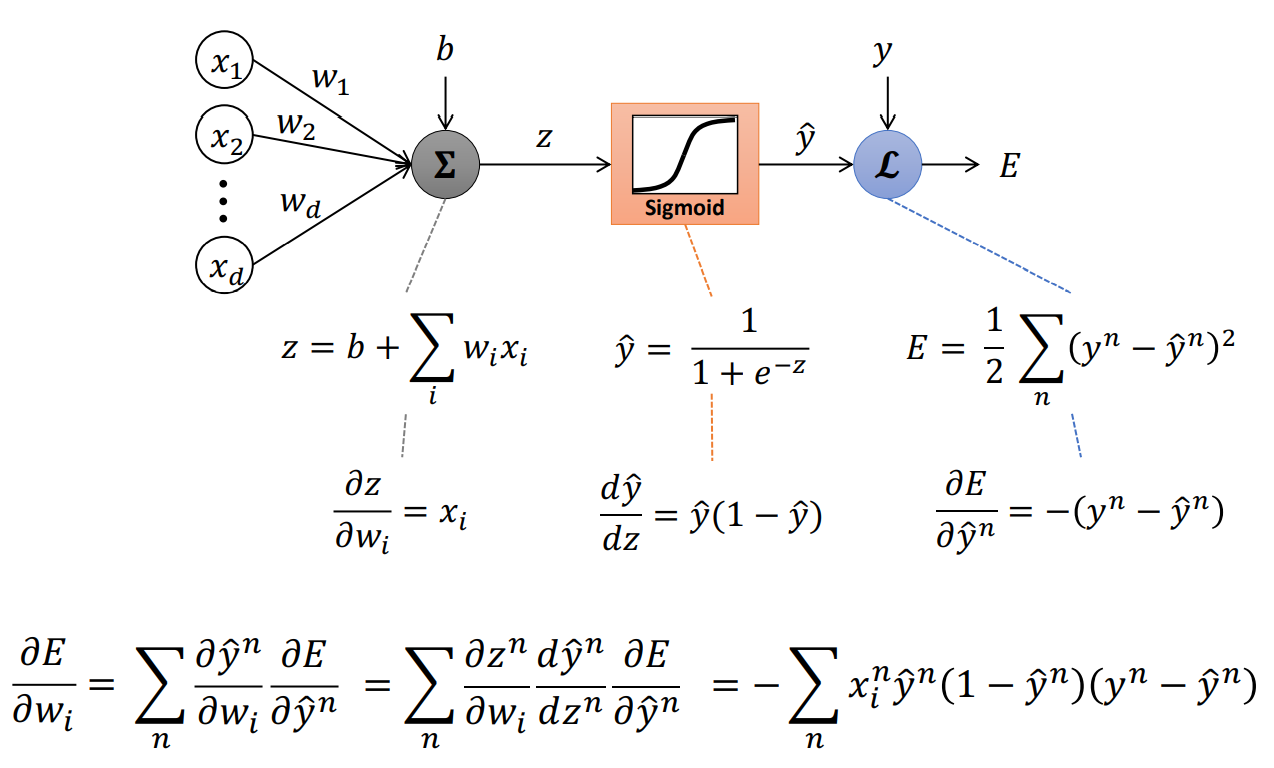

In [ ]:
x = torch.tensor([5., 3., 9., 7.], requires_grad = True)
w = torch.tensor([0., 1., 2., 3.], requires_grad = True)
b = torch.tensor(0., requires_grad = True)

z = sum(x*w) + b
x, w, z

(tensor([5., 3., 9., 7.], requires_grad=True),
 tensor([0., 1., 2., 3.], requires_grad=True),
 tensor(42., grad_fn=<AddBackward0>))

In [ ]:
z.backward()
x.grad, w.grad, b.grad

(tensor([0., 1., 2., 3.]), tensor([5., 3., 9., 7.]), tensor(1.))

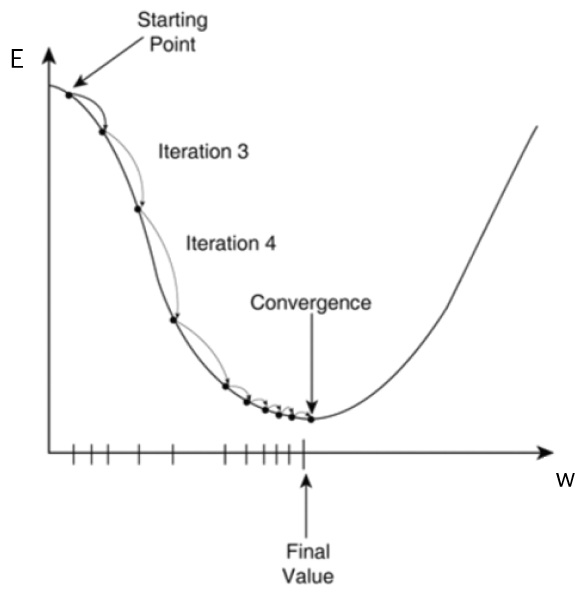

In [ ]:
learning_rate = 0.01
w = w - learning_rate*w.grad
print(w)

tensor([-0.0500,  0.9700,  1.9100,  2.9300], grad_fn=<SubBackward0>)


In [ ]:
z = sum(x*w) + b
z

tensor(40.3600, grad_fn=<AddBackward0>)


reference
- https://pytorch.org/docs/stable/index.html
- https://subinium.github.io/pytorch-Tensor-Variable/ (텐서 다루기)
- https://statisticsplaybook.tistory.com/6 (텐서 연산)